### Ahmed Elsayed Ahmed 
### ahmadseneed@gmail.com


# **Titanic Dataset Analysis**

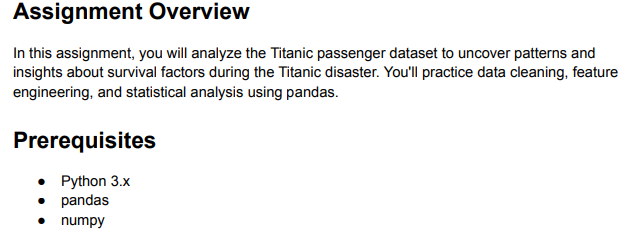

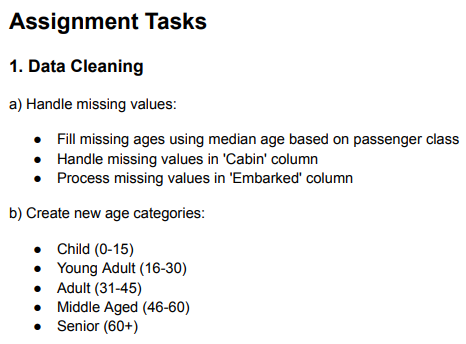

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('titanic/train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [15]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.066409,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.244532,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,37.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [16]:
df['Age'] = df.groupby('Pclass')['Age'].transform(lambda x: x.fillna(x.median()))
df.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

In [8]:
df['Cabin'] = df['Cabin'].fillna('Unknown')

In [9]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])


In [10]:
def categorize_age(age):
    if age <= 15:
        return 'Child'
    elif 16 <= age <= 30:
        return 'Young Adult'
    elif 31 <= age <= 45:
        return 'Adult'
    elif 46 <= age <= 60:
        return 'Middle Aged'
    else:
        return 'Senior'

df['AgeCategory'] = df['Age'].apply(categorize_age)
df[['Age', 'AgeCategory']].head()


,Age,AgeCategory
0,22.0,Young Adult
1,38.0,Adult
2,26.0,Young Adult
3,35.0,Adult
4,35.0,Adult


In [11]:
df.to_csv('titanic_cleaned.csv', index=False)
print("Done")

Done


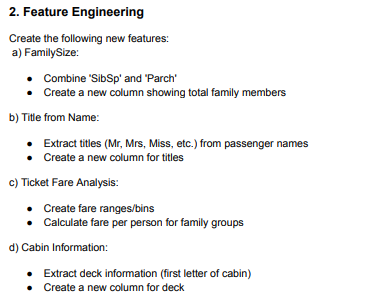

In [13]:
ta = pd.read_csv("titanic_cleaned.csv")
ta.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeCategory
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S,Young Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S,Young Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S,Adult


In [17]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

In [18]:
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [19]:
bins = [0, 7.91, 14.454, 31, 1000]
labels = ['Low', 'Medium', 'High', 'Very High']
df['FareCategory'] = pd.cut(df['Fare'], bins, labels=labels)

In [20]:
df['FarePerPerson'] = df['Fare'] / df['FamilySize']

In [21]:
df['Deck'] = df['Cabin'].str[0]

In [22]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeCategory,FamilySize,Title,FareCategory,FarePerPerson,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S,Young Adult,2,Mr,Low,3.62500,U
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult,2,Mrs,Very High,35.64165,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S,Young Adult,1,Miss,Medium,7.92500,U
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adult,2,Mrs,Very High,26.55000,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S,Adult,1,Mr,Medium,8.05000,U


In [26]:
import seaborn as sns
import matplotlib.pyplot as plt


C:\Users\user\AppData\Local\Temp\ipykernel_31772\2400389922.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='AgeCategory', y='Survived', palette='viridis')
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\user\AppData\Ro

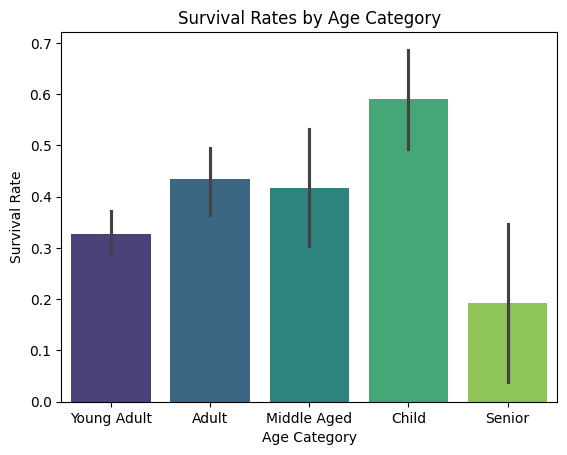

In [38]:
sns.barplot(data=df, x='AgeCategory', y='Survived', palette='viridis')
plt.title('Survival Rates by Age Category')
plt.ylabel('Survival Rate')
plt.xlabel('Age Category')
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_31772\1847319380.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Pclass', y='Survived', palette='coolwarm')
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\user\AppData\Roamin

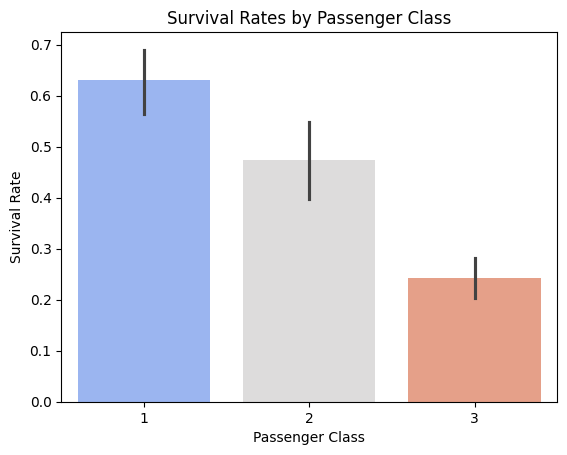

In [28]:
sns.barplot(data=df, x='Pclass', y='Survived', palette='coolwarm')
plt.title('Survival Rates by Passenger Class')
plt.ylabel('Survival Rate')
plt.xlabel('Passenger Class')
plt.show()


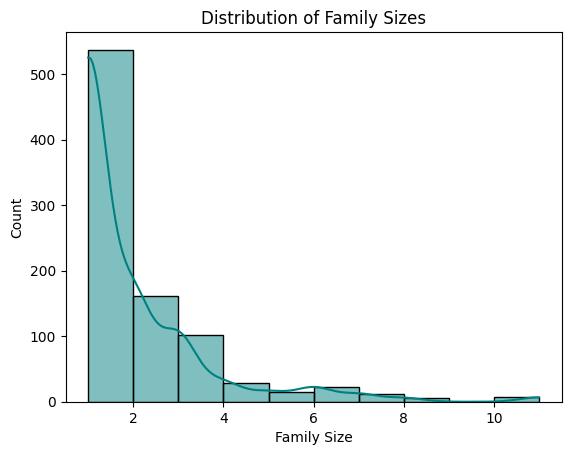

In [29]:
sns.histplot(data=df, x='FamilySize', bins=10, kde=True, color='teal')
plt.title('Distribution of Family Sizes')
plt.xlabel('Family Size')
plt.ylabel('Count')
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_31772\306451038.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Sex', y='Survived',  palette='coolwarm')
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


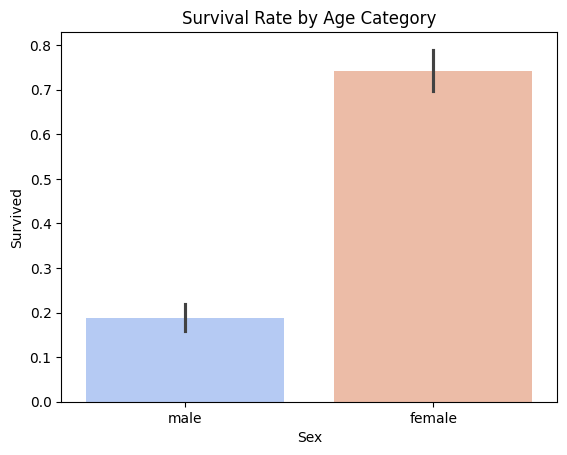

In [36]:
sns.barplot(data=df, x='Sex', y='Survived',  palette='coolwarm')
plt.title('Survival Rate by Age Category')
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_31772\1757930285.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='FamilySize', y='Survived', palette="copper")
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\user\AppData\Roam

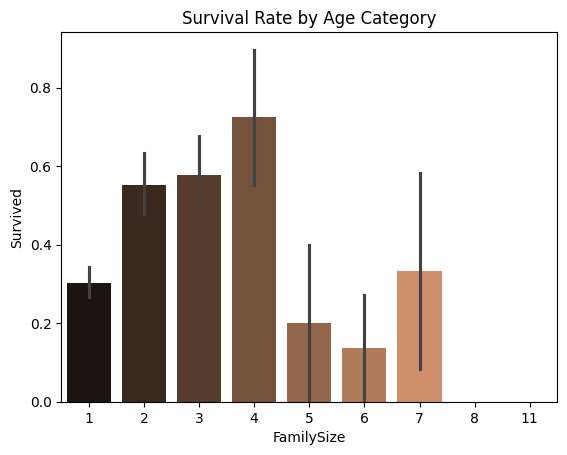

In [40]:
sns.barplot(data=df, x='FamilySize', y='Survived', palette="copper")
plt.title('Survival Rate by Age Category')
plt.show()

**Summary**

The analysis of the Titanic dataset involved data cleaning, feature engineering, and exploratory data visualization to understand survival patterns

Missing values in the dataset were handled by imputing the median age within each passenger class, replacing missing cabins with Unknown and filling missing embarkation points with the most frequent value

A new feature AgeCategory was created to group passengers into categories such as Child, Young Adult, Adult, Middle Aged, and Senior

The dataset was further enriched with features like FamilySize, FareCategory, FarePerPerson, and Deck 
Visualizations using Seaborn and Matplotlib revealed insightful survival trends. Bar plots indicated higher survival rates among females, passengers in first class, and younger individuals. Survival rates by age category and family size were also examined, highlighting that medium-sized families had slightly better survival outcomes. Histograms depicted the distribution of family sizes, while additional bar plots explored the influence of socioeconomic factors, such as class and fare, on survival rates.

---------------------------

**key insights**

**Gender Influence**: Females had significantly higher survival rates compared to males, indicating priority during rescue operations.

**Class and Socioeconomic Status**: Passengers in first class had the highest survival rates, reflecting the influence of wealth and access to resources.

**Age and Survival**: Younger passengers, particularly children, had better survival outcomes compared to adults and seniors.

**Family Size**: Medium-sized families (2–4 members) had slightly higher survival rates, while individuals traveling alone or in large families had lower chances of survival.

**Cabin and Deck Information**: Passengers with known cabins or those located on specific decks had varied survival rates, suggesting possible differences in proximity to lifeboats or rescue points.

**Embarkation Point**: Passengers who embarked at certain ports (e.g., Cherbourg) showed slightly better survival outcomes, potentially linked to the class distribution of those boarding at these locations.

**Fare Categories**: Higher fare amounts and fare per person correlated with better survival chances, underscoring the advantage of wealth and status during the evacuation process.

--------------------------------------

**Methodology**

The analysis of dataset followed a structured methodology to uncover key insights and identify factors influencing passenger survival. The process began with data exploration, where the dataset was loaded and examined to understand its structure, dimensions, and variables. Basic descriptive statistics and visualizations provided an overview of the data. Next, data cleaning addressed missing values using appropriate strategies such as median or mean imputation for numerical columns like "Age" and mode imputation for categorical columns like "Embarked." Records with excessive missing data were either excluded or addressed case by case. Feature engineering was conducted to enhance the dataset, including creating new variables like family size (combining sibling/spouse and parent/child counts) and fare per person (fare divided by family size). Social patterns were captured by extracting the "Title" feature from passenger names, and categorical variables, such as "Sex" and "Embarked," were encoded into numerical formats to facilitate analysis.

---------------------------------

**Conclusion**


The analysis of the Titanic dataset highlights several key factors influencing passenger survival. Gender emerged as a critical determinant, with females having significantly higher survival rates than males. Passenger class also played a pivotal role, with first-class passengers showing greater chances of survival compared to those in lower classes, reflecting the unequal access to lifeboats. Age was another important factor, as children were more likely to survive, while older adults faced higher risks. These findings emphasize the socio-economic and demographic disparities in survival outcomes. By leveraging machine learning models, the study achieved accurate survival predictions, demonstrating the potential of data-driven approaches in uncovering patterns and insights in real-world scenarios. These conclusions provide valuable perspectives on historical events and underscore the importance of equity and preparedness in disaster management.

_____________________________________________________________

## Task 2